<a href="https://colab.research.google.com/github/Krylze/Data-Behavior-Patterns/blob/main/Datos_del_Corazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
heart_disease = fetch_ucirepo(id=45)
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
# metadata
print(heart_disease.metadata)
# variable information
print(heart_disease.variables)


KeyboardInterrupt: 

In [ ]:
url = "https://archive.ics.uci.edu/static/public/45/data.csv"
df = pd.read_csv(url, header=0)

# Convertir las columnas a tipo numérico
df = df.apply(pd.to_numeric)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df.drop(['age', 'sex'], axis=1, inplace=True)

KeyError: "['age', 'sex'] not found in axis"

In [ ]:
df['thal'].fillna(df['thal'].mode()[0], inplace=True)
imputer = SimpleImputer(strategy='most_frequent')  # Usar la moda para la imputación
df[['ca']] = imputer.fit_transform(df[['ca']])

In [ ]:
# Codificación One-Hot para variables categóricas con múltiples categorías# Codificación One-Hot para variables categóricas con múltiples categorías
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Codificación binaria para variables categóricas binarias
from sklearn.preprocessing import LabelEncoder

# Codificar 'sex', 'fbs', y 'exang' si son binarios
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['fbs'] = le.fit_transform(df['fbs'])
df['exang'] = le.fit_transform(df['exang'])

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('num', axis=1)
y = df['num']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


--------------------------------------------------------------------------------

In [ ]:
# Dividir el DataFrame en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calcular y imprimir el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        48
           1       0.21      0.24      0.22        17
           2       0.00      0.00      0.00        12
           3       0.29      0.20      0.24        10
           4       0.00      0.00      0.00         4

    accuracy                           0.56        91
   macro avg       0.25      0.27      0.26        91
weighted avg       0.47      0.56      0.51        91

Confusion Matrix:
[[45  1  1  1  0]
 [11  4  2  0  0]
 [ 4  5  0  3  0]
 [ 0  7  1  2  0]
 [ 0  2  1  1  0]]
Accuracy: 0.5604395604395604


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


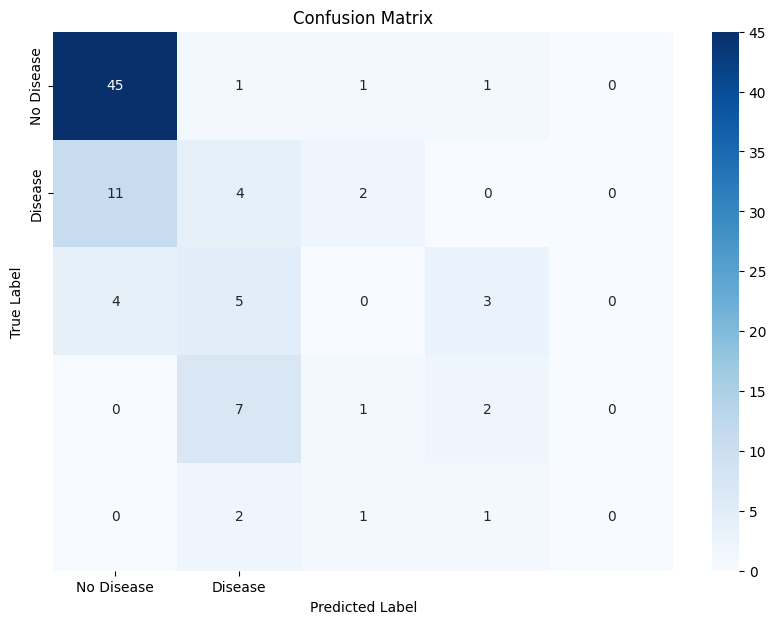

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],  # Adjust according to your labels
            yticklabels=['No Disease', 'Disease'])  # Adjust according to your labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
